In [1]:
import os
os.chdir('..')

In [2]:
from src.utils import *
from src.mol.preprocess import *
from src.mol.features import *
from src.mol.mpl_rdkit_utils import plot_mol_graph
from src.mol.mol_dataset import MolDataset
from src.mol.gcn import GCN

In [3]:
all_candidates_train = load_pkl('cache/pkl/v1/candidates.train.pkl')
all_candidates_test = load_pkl('cache/pkl/v1/candidates.test.pkl')

In [4]:
mapped_smiles = mapped_smiles_reader('cache/mapped_drugs/all_mapped.txt')
x_train, y_train = candidate_smiles(all_candidates_train, mapped_smiles)
x_test, y_test = candidate_smiles(all_candidates_test, mapped_smiles)

In [5]:
dataset_train = MolDataset(x_train, y_train)
dataset_test = MolDataset(x_test, y_test)

Converting SMILES to PyG: 100%|██████████| 3374/3374 [00:05<00:00, 618.86it/s]


# GCN

In [16]:
model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(4, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=5, bias=True)
)


In [10]:
dataset_train[1][0]

[Data(x=[33, 4], edge_index=[2, 70], edge_attr=[70, 2], mol=<rdkit.Chem.rdchem.Mol object at 0x7f1ff3d72570>, smiles='CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O'),
 Data(x=[19, 4], edge_index=[2, 42], edge_attr=[42, 2], mol=<rdkit.Chem.rdchem.Mol object at 0x7f1ff3d72420>, smiles='CN1C=NC(=C1SC2=NC=NC3=C2NC=N3)[N+](=O)[O-]')]

In [11]:
dataset_train[1][0][1].smiles

'CN1C=NC(=C1SC2=NC=NC3=C2NC=N3)[N+](=O)[O-]'

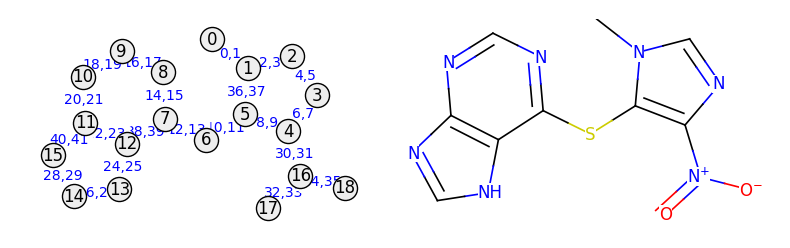

In [9]:
plot_mol_graph(dataset_train[1][0][1])

In [15]:
model(dataset_train[0][0][0], dataset_train[0][0][1])

tensor([[ 0.1014, -0.3531, -0.7211,  1.7758, -0.0424]],
       grad_fn=<AddmmBackward0>)